<a href="https://colab.research.google.com/github/yunjeongcho/colab/blob/main/chr20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

read_file = pd.read_csv (r'/content/drive/MyDrive/project/gnomAD_chr20.txt')
read_file.to_csv (r'/content/drive/MyDrive/project/gnomAD_chr20.csv', index=None)

read_file = pd.read_csv (r'/content/drive/MyDrive/project/variants1722_cmm_chr20_pre2.txt')
read_file.to_csv (r'/content/drive/MyDrive/project/KGD_chr20.csv', index=None)

In [ ]:
gnomAD_chr20 = pd.read_csv('/content/drive/MyDrive/project/gnomAD_chr20.csv', delimiter = '\t')
KGD_chr20 = pd.read_csv('/content/drive/MyDrive/project/KGD_chr20.csv', delimiter = '\t')

In [ ]:
g20_ref = gnomAD_chr20.groupby("%REF")["%REF"].count()
k20_ref = KGD_chr20.groupby("reference")["reference"].count()

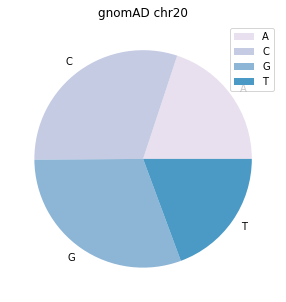

In [ ]:
fig=plt.figure(figsize=(5,5))
colors = sns.color_palette('PuBuGn')

plt.pie(g20_ref, labels = g20_ref.index, colors=colors)
plt.title("gnomAD chr20")
plt.legend()
plt.show()

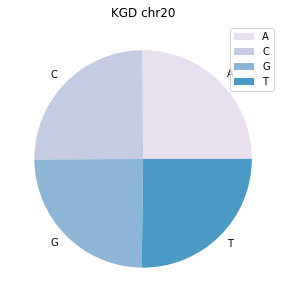

In [ ]:
fig=plt.figure(figsize=(5,5))
colors = sns.color_palette('PuBuGn')

plt.pie(k20_ref, labels = k20_ref.index, colors=colors)
plt.title("KGD chr20")
plt.legend()
plt.show()

In [ ]:
df= pd.concat([gnomAD_chr20,KGD_chr20], axis =1)
df1 = df.reset_index(drop=True)
df1

,%CHROM,%POS,%ID,%REF,%ALT,chr,pos,rsName,No.Allele,reference,ref.freq,{altreq}
0,20,60016,rs1400704382,G,A,chr20,61098.0,rs6078030,3.0,C,0.533120,T
1,20,60038,rs898097864,A,G,chr20,61098.0,rs6078030,3.0,C,0.533120,A
2,20,60049,rs1236196990,G,T,chr20,61131.0,rs1260214145,2.0,A,0.937941,C
3,20,60092,rs1272446285,G,A,chr20,61138.0,-,2.0,C,0.988830,T
4,20,60121,rs1482667447,C,T,chr20,61271.0,rs578019153,2.0,T,0.964897,C
...,...,...,...,...,...,...,...,...,...,...,...,...
4799693,20,62965478,rs1156734519,G,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4799694,20,62965480,rs868110288,T,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4799695,20,62965513,rs868219627,C,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4799696,20,62965515,rs1369444519,C,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project/KGD_chr20.csv', delimiter = '\t')
df2 = df.astype({'pos':'int64'})

df2["{altreq}"] = df2["{altreq}"].str.replace(" ", "")
df2

,chr,pos,rsName,No.Allele,reference,ref.freq,{altreq}
0,chr20,61098,rs6078030,3,C,0.533120,T
1,chr20,61098,rs6078030,3,C,0.533120,A
2,chr20,61131,rs1260214145,2,A,0.937941,C
3,chr20,61138,-,2,C,0.988830,T
4,chr20,61271,rs578019153,2,T,0.964897,C
...,...,...,...,...,...,...,...
394457,chr20,62964410,rs199948695,2,A,0.937500,G
394458,chr20,62964455,rs201855143,2,A,0.875000,G
394459,chr20,62964725,rs1181855552,2,T,0.968750,A
394460,chr20,62965185,rs2209071,2,C,0.770821,A


In [ ]:
chr20 = pd.merge(gnomAD_chr20,KGD_chr20,left_on="%POS",right_on="pos")

chr20["{altreq}"] = chr20["{altreq}"].str.replace(" ", "")
chr20

,%CHROM,%POS,%ID,%REF,%ALT,chr,pos,rsName,No.Allele,reference,ref.freq,{altreq}
0,20,61098,rs6078030,C,T,chr20,61098,rs6078030,3,C,0.533120,T
1,20,61098,rs6078030,C,T,chr20,61098,rs6078030,3,C,0.533120,A
2,20,61131,rs1260214145,A,C,chr20,61131,rs1260214145,2,A,0.937941,C
3,20,61271,rs578019153,T,A,chr20,61271,rs578019153,2,T,0.964897,C
4,20,61275,rs1233471017,T,C,chr20,61275,rs1233471017,2,T,0.856889,C
...,...,...,...,...,...,...,...,...,...,...,...,...
323879,20,62964455,rs201855143,A,G,chr20,62964455,rs201855143,2,A,0.875000,G
323880,20,62964725,rs1181855552,T,A,chr20,62964725,rs1181855552,2,T,0.968750,A
323881,20,62965185,rs2209071,C,A,chr20,62965185,rs2209071,2,C,0.770821,A
323882,20,62965185,rs2209071,C,G,chr20,62965185,rs2209071,2,C,0.770821,A


In [ ]:
chr20_dict1 = dict(zip(chr20['%POS'], chr20['%ALT']))
chr20_dict2 = dict(zip(chr20['pos'], chr20['{altreq}']))
chr20_dict3 = dict(zip(chr20['%POS'], chr20['%REF']))

In [ ]:
import pandas as pd
col_names = ['position20','ref', 'g20', 'k20']
list_data = []
for key in chr20_dict1:
    if key in chr20_dict2:
        first, second = chr20_dict1[key], chr20_dict2[key]
        if first != second:
            third = second
            if key in chr20_dict3:
              a = chr20_dict3[key]
              result = [key,a,first,third]
              
            for i in ([result]):
              list_data.append(i)
print(list_data)

[[61098, 'C', 'T', 'A'], [61271, 'T', 'A', 'C'], [61795, 'G', 'T', 'A'], [68749, 'T', 'C', 'A'], [72560, 'T', 'C', 'A'], [73584, 'A', 'G', 'T'], [76962, 'T', 'C', 'A'], [80655, 'A', 'G', 'T'], [81979, 'T', 'G', 'C'], [81982, 'A', 'T', 'C'], [82071, 'A', 'T', 'C'], [82083, 'T', 'C', 'A'], [82127, 'C', 'G', 'A'], [82204, 'T', 'C', 'A'], [91508, 'G', 'A', 'T'], [94528, 'T', 'G', 'C'], [97394, 'A', 'G', 'T'], [101362, 'G', 'A', 'T'], [102181, 'T', 'C', 'A'], [106635, 'G', 'C', 'A'], [108187, 'A', 'G', 'T'], [108328, 'A', 'C', 'T'], [108958, 'A', 'C', 'G'], [109179, 'C', 'T', 'A'], [110098, 'A', 'G', 'T'], [111844, 'C', 'T', 'A'], [116405, 'G', 'T', 'A'], [116483, 'A', 'T', 'G'], [121559, 'C', 'G', 'A'], [121976, 'G', 'A', 'T'], [125121, 'C', 'T', 'G'], [126600, 'C', 'A', 'T'], [126730, 'C', 'T', 'G'], [126923, 'C', 'A', 'T'], [126930, 'A', 'T', 'G'], [129613, 'G', 'A', 'T'], [129864, 'C', 'T', 'A'], [133158, 'T', 'A', 'G'], [134017, 'A', 'G', 'T'], [134196, 'C', 'T', 'G'], [134284, 'T', 'C

In [ ]:
df20= pd.DataFrame(list_data, columns = col_names)
print(df20)  

       position20 ref g20 k20
0           61098   C   T   A
1           61271   T   A   C
2           61795   G   T   A
3           68749   T   C   A
4           72560   T   C   A
...           ...  ..  ..  ..
53398    62959573   A   G   C
53399    62959880   G   C   A
53400    62962130   C   T   A
53401    62962891   C   T   G
53402    62965185   C   G   A

[53403 rows x 4 columns]


In [ ]:
gAT = df20.query('ref == "A" and g20 == "T"')
len_gAT=len(gAT)
len(gAT)

3083

In [ ]:
gAC=df20.query('ref == "A" and g20 == "C"')
len_gAC=len(gAC)
len(gAC)

1927

In [ ]:
gAG =  df20.query('ref == "A" and g20 == "G"')
len_gAG=len(gAG)
len(gAG)

8572

In [ ]:
gTA=df20.query('ref == "T" and g20 == "A"')
len_gTA=len(gTA)
len(gTA)

1872

In [ ]:
gTC=df20.query('ref == "T" and g20 == "C"')
len_gTC=len(gTC)
len(gTC)

8660

In [ ]:
gTG=df20.query('ref == "T" and g20 == "G"')
len_gTG=len(gTG)
len(gTG)

3103

In [ ]:
gCA=df20.query('ref == "C" and g20 == "A"')
len_gCA=len(gCA)
len(gCA)

1902

In [ ]:
gCT=df20.query('ref == "C" and g20 == "T"')
len_gCT=len(gCT)
len(gCT)

8542

In [ ]:
gCG=df20.query('ref == "C" and g20 == "G"')
len_gCG=len(gCG)
len(gCG)

2227

In [ ]:
gGA=df20.query('ref == "G" and g20 == "A"')
len_gGA=len(gGA)
len(gGA)

6464

In [ ]:
gGT=df20.query('ref == "G" and g20 == "T"')
len_gGT=len(gGT)
len(gGT)

4050

In [ ]:
gGC=df20.query('ref == "G" and g20 == "C"')
len_gGC=len(gGC)
len(gGC)

3001

In [ ]:
kAT=df20.query('ref == "A" and k20 == "T"')
len_kAT=len(kAT)
len(kAT)

7664

In [ ]:
kAC=df20.query('ref == "A" and k20 == "C"')
len_kAC=len(kAC)
len(kAC)

3375

In [ ]:
kAG=df20.query('ref == "A" and k20 == "G"')
len_kAG=len(kAG)
len(kAG)

2543

In [ ]:
kTA=df20.query('ref == "T" and k20 == "A"')
len_kTA=len(kTA)
len(kTA)

5207

In [ ]:
kTC=df20.query('ref == "T" and k20 == "C"')
len_kTC=len(kTC)
len(kTC)

2559

In [ ]:
kTG=df20.query('ref == "T" and k20 == "G"')
len_kTG=len(kTG)
len(kTG)

5869

In [ ]:
kCA=df20.query('ref == "C" and k20 == "A"')
len_kCA=len(kCA)
len(kCA)

3723

In [ ]:
kCT=df20.query('ref == "C" and k20 == "T"')
len_kCT=len(kCT)
len(kCT)

2481

In [ ]:
kCG=df20.query('ref == "C" and k20 == "G"')
len_kCG=len(kCG)
len(kCG)

6467

In [ ]:
kGA=df20.query('ref == "G" and k20 == "A"') 
len_kGA=len(kGA)
len(kGA)

3750

In [ ]:
kGT=df20.query('ref == "G" and k20 == "T"')
len_kGT=len(kGT)
len(kGT)

4475

In [ ]:
kGC=df20.query('ref == "G" and k20 == "C"')
len_kGC=len(kGC)
len(kGC)

5290

In [ ]:
import pandas as pd
plt_data = pd.DataFrame({'AT':[len_gAT,len_kAT],'AC':[len_gAC, len_kAC],'AG':[len_gAG,len_kAG],'TA':[len_gTA,len_kTA],'TC':[len_gTC,len_kTC],'TG':[len_gTG, len_kTG],'CA':[len_gCA,len_kCA],'CT':[len_gCT,len_kCT],'CG':[len_gCG,len_kCG],'GA':[len_gGA,len_kGA],'GT':[len_gGT,len_kGT],'GC':[len_gGC,len_kGC]})
plt_data

,AT,AC,AG,TA,TC,TG,CA,CT,CG,GA,GT,GC
0,3083,1927,8572,1872,8660,3103,1902,8542,2227,6464,4050,3001
1,7664,3375,2543,5207,2559,5869,3723,2481,6467,3750,4475,5290


In [ ]:
import pandas as pd

gnomAD = [3083,1927,8572,1872,8660,3103,1902,8542,2227,6464,4050,3001]
KGD = [7664,3375,2543,5207,2559,5869,3723,2481,6467,3750,4475,5290]
이
alt=['AT','AC','AG','TA','TC','TG','CA','CT','CG','GA','GT','GC']

df = pd.DataFrame({'gnomAD' : gnomAD, 'KGD' : KGD}, index = alt)
df

,gnomAD,KGD
AT,3083,7664
AC,1927,3375
AG,8572,2543
TA,1872,5207
TC,8660,2559
TG,3103,5869
CA,1902,3723
CT,8542,2481
CG,2227,6467
GA,6464,3750


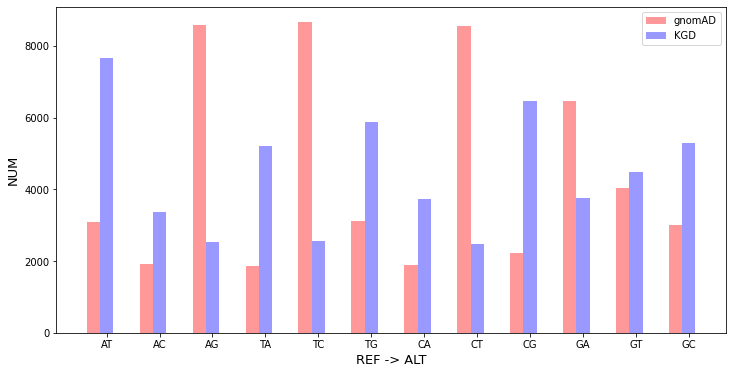

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(12)

b1 = plt.bar(index, df['gnomAD'], bar_width, alpha=0.4, color='red', label='gnomAD')

b2 = plt.bar(index + bar_width, df['KGD'], bar_width, alpha=0.4, color='blue', label='KGD')

plt.xticks(np.arange(bar_width, 12 + bar_width, 1), alt)

plt.xlabel('REF -> ALT', size = 13)
plt.ylabel('NUM', size = 13)
plt.legend()
plt.show()

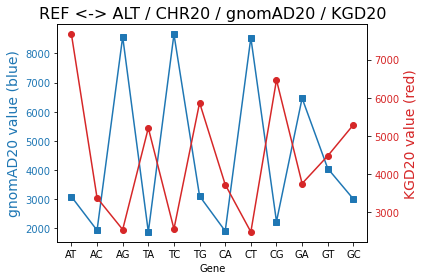

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()
color_1 = 'tab:blue'
ax1.set_title('REF <-> ALT / CHR20 / gnomAD20 / KGD20', fontsize=16)
ax1.set_xlabel('Gene')
ax1.set_ylabel('gnomAD20 value (blue)', fontsize=14, color=color_1)

x=plt_data.columns
y=plt_data.loc[0]

ax1.plot(x,y, marker='s', color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)


ax2 = ax1.twinx()
color_2 = 'tab:red'
ax2.set_ylabel('KGD20 value (red)', fontsize=14, color=color_2)
x1=plt_data.columns
y1=plt_data.loc[1]
ax2.plot(x1, y1, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)


fig.tight_layout()
plt.show()

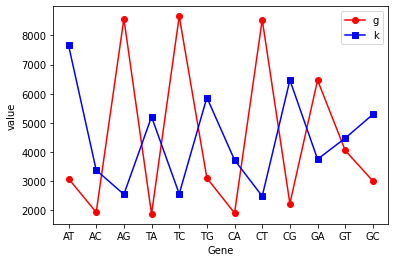

In [ ]:
from matplotlib import pyplot as plt

x_values = ['AT','AC','AG','TA','TC','TG','CA','CT','CG','GA','GT','GC']
y_values_1 = [len_gAT,len_gAC,len_gAG,len_gTA,len_gTC,len_gTG,len_gCA,len_gCT,len_gCG,len_gGA,len_gGT,len_gGC]
y_values_2 = [len_kAT,len_kAC,len_kAG,len_kTA,len_kTC,len_kTG,len_kCA,len_kCT,len_kCG,len_kGA,len_kGT,len_kGC]

plt.plot(x_values, y_values_1,label="g",color='red',marker='o')
plt.plot(x_values, y_values_2,label="k",color='blue',marker='s')

plt.xlabel('Gene')
plt.ylabel('value')


plt.legend(loc=1)

plt.show()

In [ ]:
rs1 = chr20[['%ID']]
rs3 = rs1.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

In [ ]:
rs2 = chr20[['rsName']]
rs4 = rs2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

In [ ]:
rs3['%ID'].to_list()
lst1=list(rs3['%ID'])
rs4['rsName'].to_list()
lst2=list(rs4['rsName'])
lst3 = set(lst2)-set(lst1)

In [ ]:
rs_list = pd.DataFrame (lst3, columns = ['rs'])
rs_list.sort_values(ascending=False,by=['rs'])


,rs
210,rs999986967
1736,rs999942756
2164,rs999663831
4972,rs999600564
1666,rs999377628
...,...
575,rs1001517943
4936,rs1001489588
2944,rs1001045073
3278,rs1000412877


In [ ]:
rs = pd.concat([rs1,rs2],axis=1).reset_index(drop=True).drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
rs

,%ID,rsName
0,rs6078030,rs6078030
1,rs1260214145,rs1260214145
2,rs578019153,rs578019153
3,rs1233471017,rs1233471017
4,rs369265459,rs369265459
...,...,...
248389,rs199948695,rs199948695
248390,rs201855143,rs201855143
248391,rs1181855552,rs1181855552
248392,rs2209071,rs2209071


In [ ]:
rs4['rsName'].isin(rs3['%ID']).value_counts()

True     242927
False      5145
Name: rsName, dtype: int64

In [ ]:
import pandas as pd

gprob = [0.000255,0.000097,0.000007,0.00028,0.000047,0.00005,0.00003]
kprob = [0.5263,0.5522,0.0092,0.3372,1.0,0.1089,0.1137]

rsnumber = ['rs111067188(G)','rs1057042825(T)','rs1055834488(G)','rs1054010914(C)','rs1051228552(T)','rs1050378764(C)','rs1050099395(C)']
df = pd.DataFrame({'GP' : gprob, 'KP' : kprob}, index = rsnumber)
df

,GP,KP
rs111067188(G),0.000255,0.5263
rs1057042825(T),0.000097,0.5522
rs1055834488(G),0.000007,0.0092
rs1054010914(C),0.000280,0.3372
rs1051228552(T),0.000047,1.0000
rs1050378764(C),0.000050,0.1089
rs1050099395(C),0.000030,0.1137


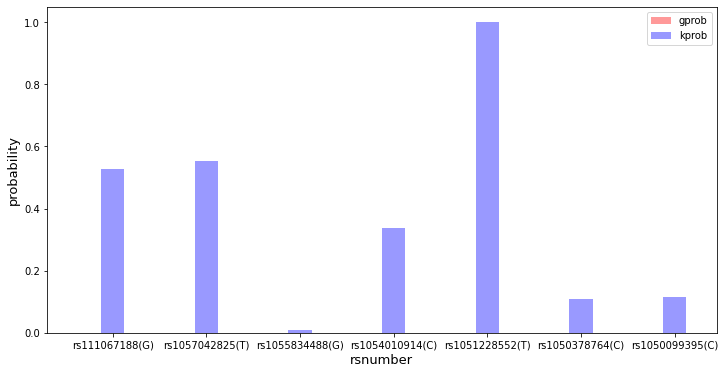

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

index = np.arange(7)

b1 = plt.bar(index, df['GP'], bar_width, alpha=0.4, color='red', label='gprob')

b2 = plt.bar(index + bar_width, df['KP'], bar_width, alpha=0.4, color='blue', label='kprob')

plt.xticks(np.arange(bar_width, 7 + bar_width, 1), rsnumber)

plt.xlabel('rsnumber', size = 13)
plt.ylabel('probability', size = 13)
plt.legend()
plt.show()